In [142]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [143]:
dataset = pd.read_excel('train.xlsx')

In [144]:
dataset.shape

(3998, 39)

In [145]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [146]:
dataset.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [147]:
encoder = LabelEncoder()
deg = encoder.fit_transform(dataset['Degree'])

In [148]:
dataset['Degree'] = deg

In [149]:
X = dataset.iloc[:,[9,12,15,16,18,23]].values
y = dataset['Salary'].values

In [150]:
deg = deg.reshape(-1,1)
onehot = OneHotEncoder(categories='auto')
X = onehot.fit_transform(X)

In [151]:
y = dataset['Salary'].values
y = y.reshape(-1,1)
std = StandardScaler()
# X = std.fit_transform(X)
y = std.fit_transform(y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [152]:
X.shape

(3998, 3051)

In [123]:
X0 = np.ones(len(X))
newX = np.array([X0,X[:,0],X[:,1],X[:,2],X[:,3],X[:,4],X[:,5],X[:,6]])

In [124]:
newX.shape

(8, 3998)

In [125]:
newX = newX.T

In [126]:
newX.shape

(3998, 8)

In [127]:
b = np.zeros(newX.shape[1])

In [128]:
n = len(newX)

In [129]:
def cost_function(X,y,b):
    return np.sum((X.dot(b) - y)**2) / n

In [130]:
cost_function(newX,y,b)

3997.999999999997

In [131]:
def gradient(X,y,b,epochs,alpha):
    cost_history = [0] * epochs
    for epoch in range(epochs):
        y_pred = X.dot(b)
        loss = y_pred - y
        grad = 2/n * X.T.dot(loss)
        b = b - alpha * grad
        cost = cost_function(X,y,b)
        cost_history[epoch] = cost
    return cost_history, b

In [132]:
b = np.zeros(newX.shape[1])
epochs = 10000
alpha = 0.0001
cost,b = gradient(newX, y.flatten(),b,epochs,alpha)

In [133]:
import matplotlib.pyplot as plt

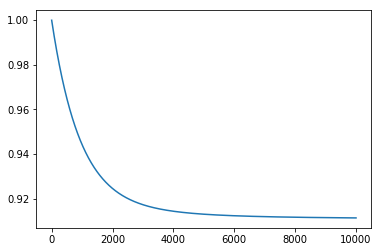

In [134]:
plt.plot([i for i in range(epochs)], cost)

In [135]:
cost[-1]

0.911310769724696

In [136]:
pred = newX.dot(b)

In [137]:
pred = std.inverse_transform(pred)

In [138]:
pred[0]

352084.0729139184

In [139]:
actual_y = std.inverse_transform(y)

In [140]:
actual_y[0]

array([420000.])